# Runtime Visualization

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from benchmark.file import concat_results
from benchmark.environment import IMPROVEMENTS, STATES
import seaborn as sns
import matplotlib.pyplot as plt
from os import chdir
from pathlib import Path
from itertools import product

In [3]:
if not "PROJECT_DIR" in globals():
    PROJECT_DIR = Path().resolve().parent
    chdir(PROJECT_DIR)

if not "DATA_DIR" in globals():
    DATA_DIR = PROJECT_DIR / "runtime" / "data"

if not "FIG_DIR" in globals():
    FIG_DIR = PROJECT_DIR / "runtime" / "figures"
    FIG_DIR.mkdir(exist_ok=True, parents=True)

In [4]:
states = list(product(IMPROVEMENTS, STATES))
states

[('environment-independence', 'before'),
 ('environment-independence', 'after'),
 ('service-merge', 'before'),
 ('service-merge', 'after')]

## Deployment

In [5]:
deployment_actions = ["cold-start", "warm-start", "stop", "remove"]

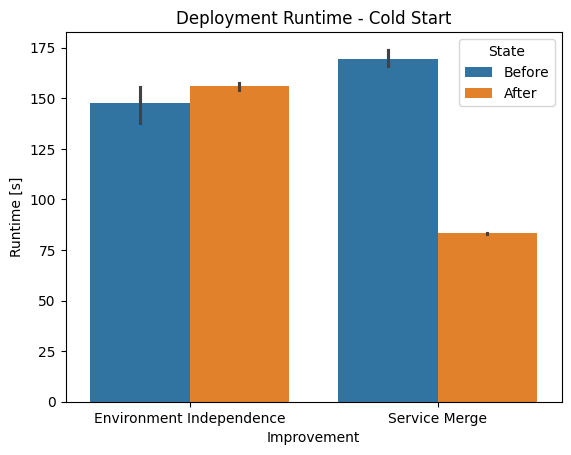

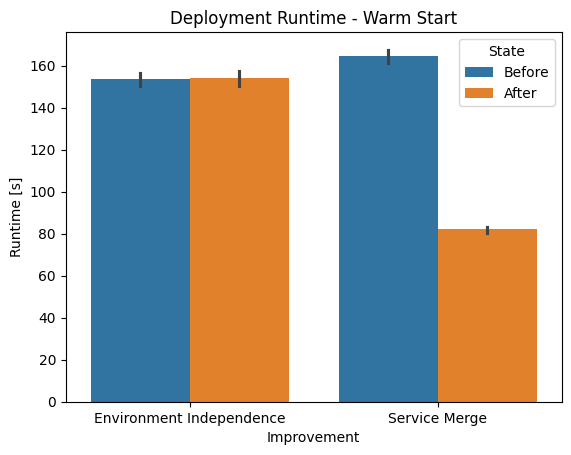

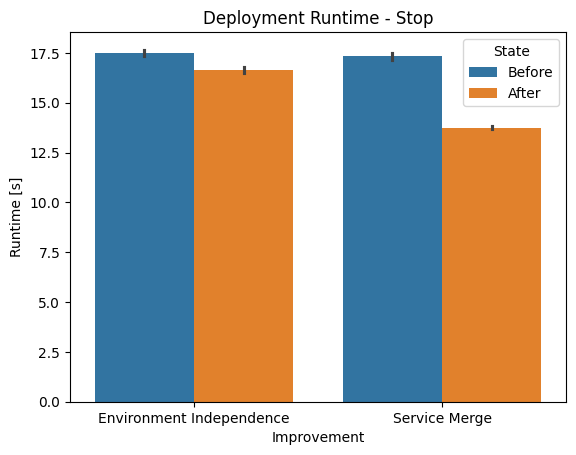

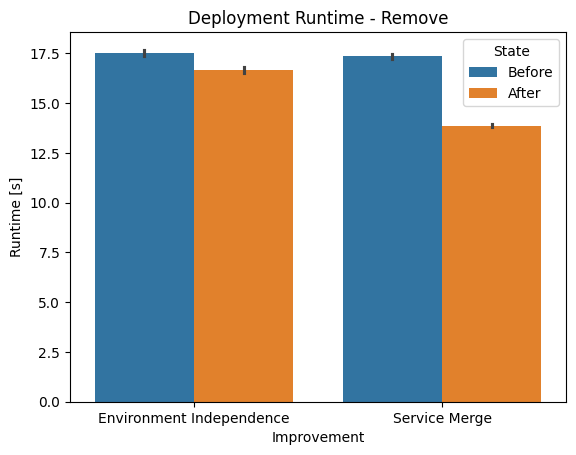

In [6]:
for deployment_action in deployment_actions:
    data = concat_results(
        action=deployment_action,
        states=states,
        directory=DATA_DIR,
    )
    sns.barplot(
        data=data,
        x="Improvement",
        y="Duration",
        hue="State",
    )
    plt.title(f"Deployment Runtime - {deployment_action.replace('-', ' ').title()}")
    plt.ylabel("Runtime [s]")
    plt.savefig(FIG_DIR / f"deployment-benchmark_{deployment_action}.pdf")
    plt.show()

## API

In [7]:
api_actions = [
    "create-database",
    "create-table",
    "create-query",
    "execute-query",
    "insert-row",
    "update-row",
    "delete-row",
    "import-csv",
]

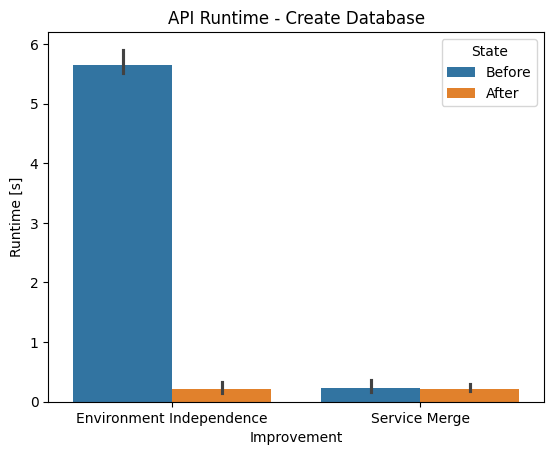

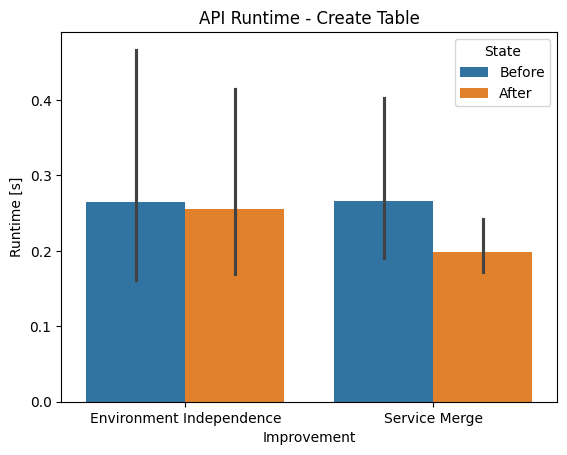

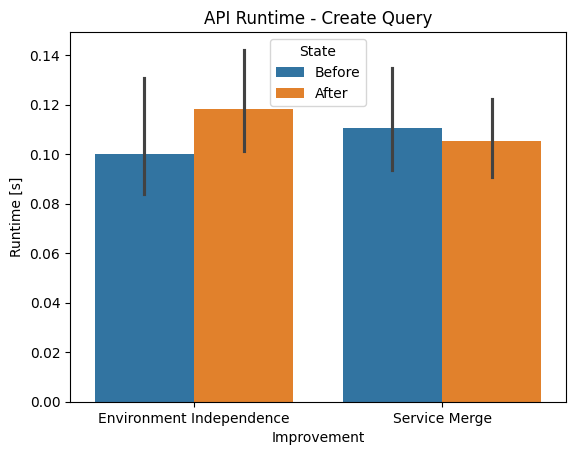

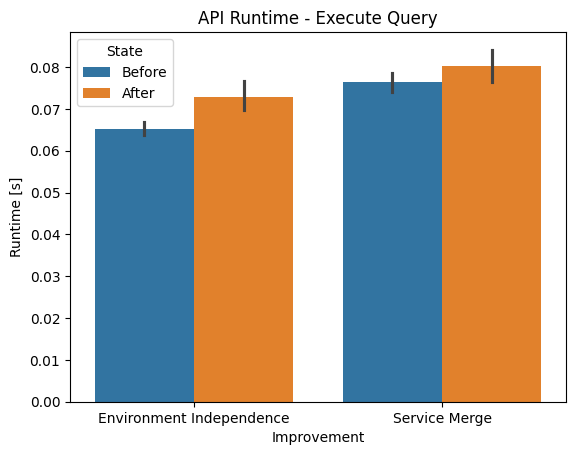

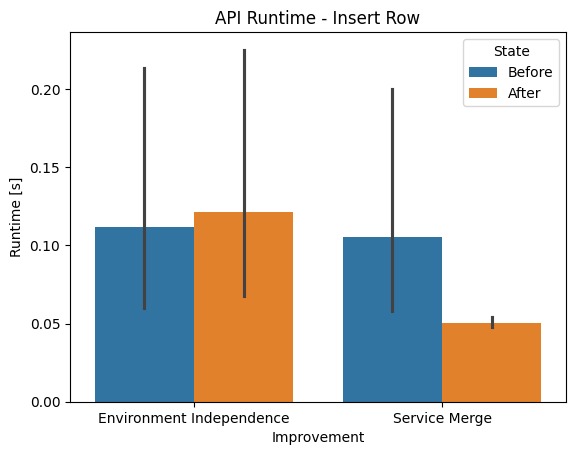

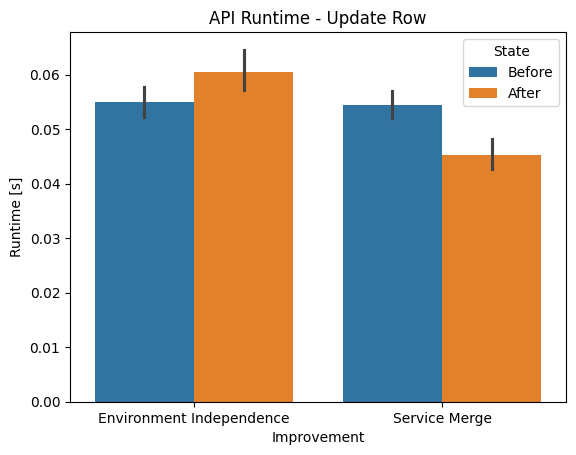

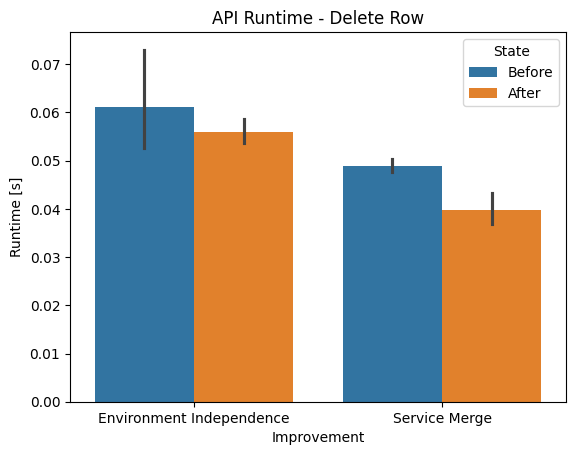

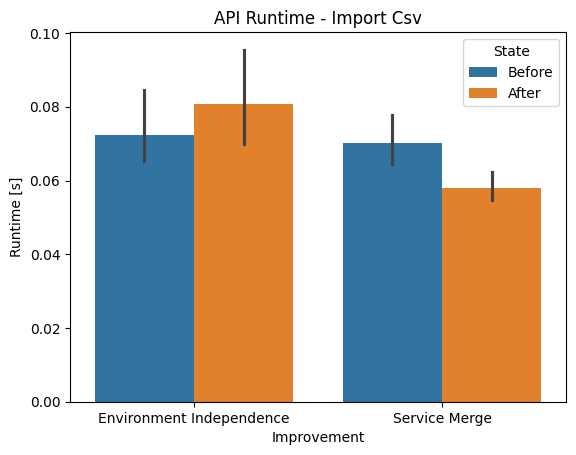

In [8]:
for api_action in api_actions:
    data = concat_results(
        action=api_action,
        states=states,
        directory=DATA_DIR,
    )
    sns.barplot(
        data=data,
        x="Improvement",
        y="Duration",
        hue="State",
    )
    plt.title(f"API Runtime - {api_action.replace('-', ' ').title()}")
    plt.ylabel("Runtime [s]")
    plt.savefig(FIG_DIR / f"api-benchmark_{api_action}.pdf")
    plt.show()